#  📚 Library Imports – Step-by-Step Explanation

In [50]:
#  Imoprt Libraries

# Data handling and numerical computations
import numpy as np

# Load MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

# Deep learning framework (TensorFlow & Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

# ===============================
# Ignore Warnings
# ===============================
import warnings
warnings.filterwarnings('ignore')

#1️⃣ Data Handling & Numerical Computation

+   >"import numpy as np"

*Explanation:
+ NumPy is the core Python library for numerical operations.
+ It provides:
    > Multi-dimensional arrays

    > Matrix operations

    > Fast mathematical calculations

+ Why we need it for MNIST? :
    > Images are stored as matrices (28×28 pixels)

    > We normalize pixel values

    > Perform reshaping and preprocessing

2️⃣ Load MNIST Dataset
+   > "from tensorflow.keras.datasets import mnist"

*Explanation:

+ This imports the built-in MNIST handwritten digits dataset.

+ MNIST contains:

    > 60,000 training images

    > 10,000 testing images

    > Each image is 28×28 grayscale

+ Why useful?
    > No need to download manually — Keras provides it directly.

3️⃣ Deep Learning Framework (TensorFlow & Keras)

+   >"import tensorflow as tf"

    >"from tensorflow import keras"

*Explanation:

+ TensorFlow → backend computation engine
+ Keras → high-level API to easily build neural networks

+ 👉 Think of it like:

  >Tool	                         = Role

  >TensorFlow	                 = Brain (math engine)

  >Keras	                     = Interface (easy model building)

4️⃣ Neural Network Layers & Models
>"from tensorflow.keras import layers, models"

>"from tensorflow.keras.models import Sequential"

>"from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten  Dense"


*Explanation of each layer:

*Layer===================Purpose
> + Conv2D______________________Detect features (edges, curves, shapes)
> + MaxPooling2D________________Reduce image size & keep important features
> + Dropout_____________________Prevent overfitting
> + Flatten_____________________Convert 2D image → 1D vector
> + Dense_______________________Fully connected neural network layer

*Model Type
> Sequential → Layers stacked one after another

> Perfect for CNN classification problems

5️⃣ Visualization Libraries
+   >"import matplotlib.pyplot as plt"

+    >"import seaborn as sns"


*Explanation:

>Library_______________Use

>Matplotlib____________Plot images & graphs

>Seaborn_______________Beautiful statistical plots (confusion matrix)

*We will use them to:

>+ Display digits

>+ Plot training accuracy

>+ Visualize confusion matrix

6️⃣ Evaluation Metrics
+   >"from sklearn.metrics import confusion_matrix, classification_report"


*Explanation:

+ These help evaluate model performance beyond accuracy.

*Metric===============Meaning
>Confusion Matrix______________Shows prediction vs actual

>Classification Report_________Precision, Recall, F1-score


7️⃣ Ignore Warnings

>" import warnings"

>"warnings.filterwarnings('ignore')"

*Explanation:

+ >Suppresses unnecessary warning messages

+ >Keeps notebook output clean

+ >Does not affect training






In [51]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#This line loads the handwritten digit dataset (MNIST) and splits it into:

>Variable_____Meaning

>x_train	=Training images

>y_train	=Training labels

>x_test	=Testing images

>y_test	=Testing labels

*📊 Dataset Structure
>Dataset	-Number of Images	-Image Size

>Training	-60,000	-28 × 28 pixels

>Testing	-10,000	-28 × 28 pixels

+ Each image represents a handwritten digit from 0 to 9.

🧠 How the Data Looks Internally
+ Each image is stored as a matrix:

   > 28 rows × 28 columns = 784 pixel values

In [52]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [53]:

# Display dataset shapes
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [54]:
# DATASET SHAPE
print("Training images Shape:", x_train.shape)
print("Training labels Shape:", y_train.shape)
print("Testing images Shape:", x_test.shape)
print("Testing labels Shape:", y_test.shape)


Training images Shape: (60000, 28, 28)
Training labels Shape: (60000,)
Testing images Shape: (10000, 28, 28)
Testing labels Shape: (10000,)


# 🧹 Data Preprocessing (Reshaping & Normalization)

In [55]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

This code is **preprocessing image data** before giving it to a neural network (usually a CNN trained on datasets like MNIST or Fashion-MNIST).

### 1) `reshape(-1, 28, 28, 1)`

Images originally come as a **flat array (784 pixels)** or `(num_samples, 28, 28)`.

But CNN models expect a **4-D tensor**:

[
(batch_size, height, width, channels)
]

So we convert:

| Before                              | After                |
| ----------------------------------- | -------------------- |
| `(60000, 784)` or `(60000, 28, 28)` | `(60000, 28, 28, 1)` |

Meaning:

* `28 × 28` → image size
* `1` → grayscale channel
* `-1` → automatically calculate number of images

---

### 2) `.astype('float32')`

Pixel values are originally integers:

[
0 \rightarrow 255
]

Neural networks work better with **decimal numbers**, so we convert:

[
uint8 → float32
]

---

### 3) `/ 255.0` (Normalization)

We scale pixel values to the range:

[
0 → 1
]

Why?

Neural networks train faster and more accurately when inputs are small numbers.

| Before  | After     |
| ------- | --------- |
| 0 – 255 | 0.0 – 1.0 |

---


````markdown
> Image Preprocessing

```python
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
````

#### Purpose

This step prepares image data before feeding it into a Convolutional Neural Network (CNN).

#### 1. Reshaping

Images are reshaped into 4D tensors:

[
(batch_size, height, width, channels)
]

For grayscale images:

[
28 \times 28 \rightarrow (28, 28, 1)
]

`-1` automatically determines the number of samples.

---

#### 2. Type Conversion

Pixel values are converted from integers to floating point:

[
uint8 → float32
]

This improves numerical stability during training.

---

#### 3. Normalization

Pixel values are scaled from:

[
0 – 255 \rightarrow 0 – 1
]

This helps the neural network:

* Train faster
* Converge better
* Avoid large gradients

---

#### Final Data Shape

| Dataset | Shape                    |
| ------- | ------------------------ |
| x_train | (num_samples, 28, 28, 1) |
| x_test  | (num_samples, 28, 28, 1) |

```

In [56]:
unique_labels = np.unique(y_train)
print("Unique labels in the training set:", unique_labels)
print("Number of unique labels:", len(unique_labels))

Unique labels in the training set: [0 1 2 3 4 5 6 7 8 9]
Number of unique labels: 10


### 1) `np.unique(y_train)`

`y_train` contains the **target labels (classes)** for each training image.

Example (MNIST):

```
[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 5, 7, 8, 9, 0 ...]
```

`np.unique()` finds **all distinct class values** present in the dataset.

So it removes duplicates and sorts them:

```
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
```

---

### 2) Print unique labels

```python
print("Unique labels in the training set:", unique_labels)
```

This shows **which classes exist** in the dataset.

Useful to verify:

* dataset loaded correctly
* no missing classes
* classification problem type

---

### 3) Count number of classes

```python
len(unique_labels)
```

Counts how many different categories the model must predict.

For MNIST:
[
10 \text{ classes}
]

This helps decide:

* output neurons in final layer
* one-hot encoding size
* loss function choice

---

### Checking Unique Labels in Dataset

```python
unique_labels = np.unique(y_train)

print("Unique labels in the training set:", unique_labels)
print("Number of unique labels:", len(unique_labels))
````

#### Purpose

This step verifies the number of classes present in the dataset.

---

#### 1. Finding Unique Labels

`np.unique()` returns all distinct class values from the target labels.

Example:

```
y_train = [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
```

Output:

```
[0, 1, 2, 3, 4, 5, 9]
```

---

#### 2. Why This Is Important

* Confirms dataset is loaded correctly
* Detects missing classes
* Helps configure output layer of neural network

---

#### 3. Number of Classes

```
len(unique_labels)
```

This determines the number of neurons in the final softmax layer.

Example (MNIST):
[
10 \text{ output neurons}
]



Class distribution in training set: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


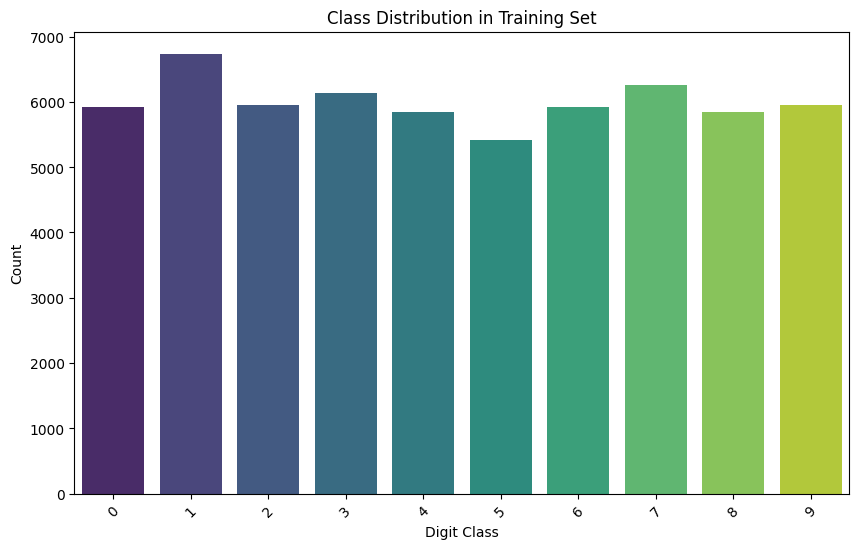

In [57]:
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))  
print("Class distribution in training set:", class_distribution)
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 1) Count samples in each class

```python
unique, counts = np.unique(y_train, return_counts=True)
```

* `unique` → list of classes (0–9)
* `counts` → how many images belong to each class

Example output:

```
unique = [0 1 2 3 4 5 6 7 8 9]
counts = [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
```

---

### 2) Create dictionary (easy to read)

```python
class_distribution = dict(zip(unique, counts))
```

Result:

```
{
0: 5923,
1: 6742,
2: 5958,
...
9: 5949
}
```

This helps detect **class imbalance**.

---

### 3) Visualize using Seaborn

```python
sns.countplot(x=y_train, palette='viridis')
```

Creates a bar chart showing number of images per class.

Why important?

* Balanced dataset → model learns fairly
* Imbalanced dataset → model biased toward majority class

---

### 4) Plot formatting

| Line            | Purpose         |
| --------------- | --------------- |
| `figsize`       | Bigger plot     |
| `title`         | Chart heading   |
| `xlabel/ylabel` | Axis names      |
| `rotation=45`   | Readable labels |

---
### Class Distribution Visualization

```python
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))  

print("Class distribution in training set:", class_distribution)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
````

---

#### Purpose

This step checks whether the dataset is balanced before training a classification model.

---

#### 1. Counting Samples Per Class

`np.unique(..., return_counts=True)` returns:

* Unique class labels
* Number of samples in each class

Example:

```
0 → 5923 images
1 → 6742 images
...
9 → 5949 images
```

---

#### 2. Creating Distribution Dictionary

```
dict(zip(unique, counts))
```

Stores class frequencies in readable format.

---

#### 3. Visualization

`sns.countplot()` creates a bar graph showing how many samples belong to each class.

---

#### Why This Matters

* Balanced dataset → fair learning
* Imbalanced dataset → biased predictions
* Helps decide if resampling is needed

---

#### Ideal Case

All bars should have approximately equal height.

```

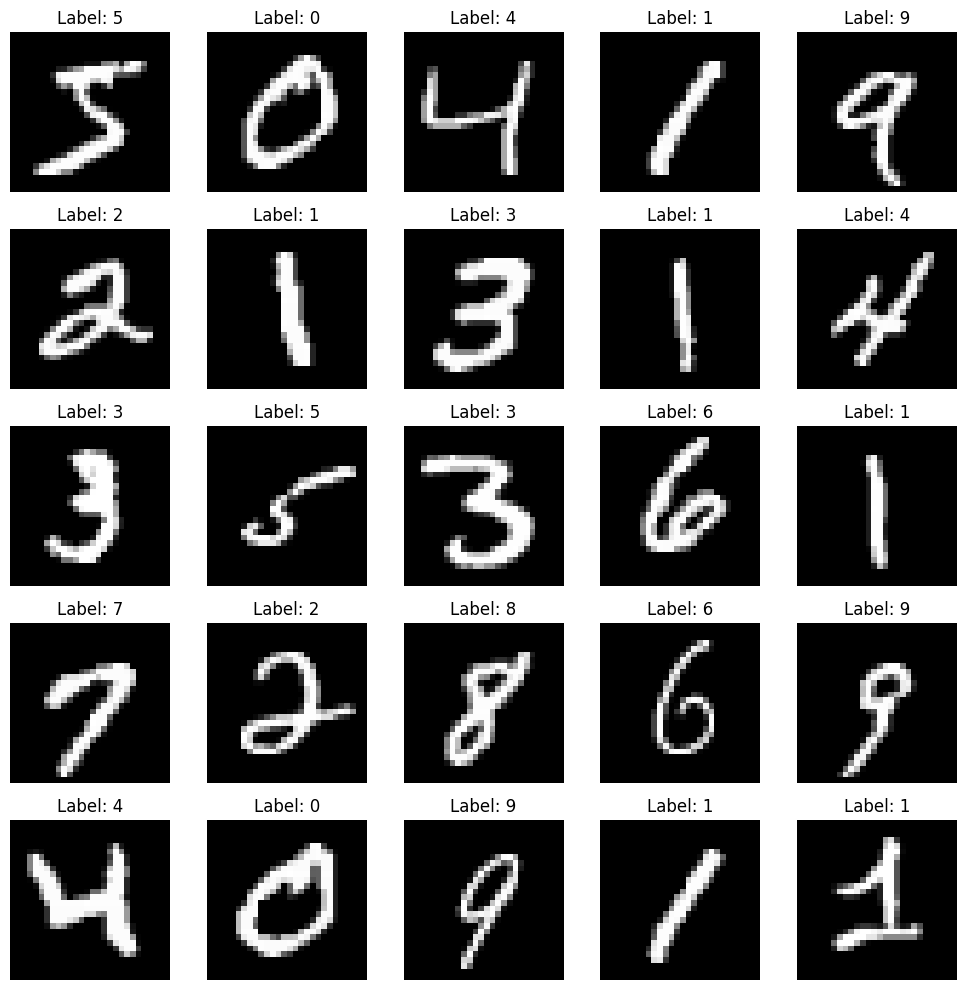

In [58]:
# Sample images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 1) Create figure

```python
plt.figure(figsize=(10, 10))
```

Creates a large square canvas to display multiple images.

---

### 2) Loop through 25 images

```python
for i in range(25):
```

We display the **first 25 training samples**.

---

### 3) Arrange in grid (5 × 5)

```python
plt.subplot(5, 5, i + 1)
```

Creates a grid:

[
5 \text{ rows} \times 5 \text{ columns} = 25 \text{ images}
]

---

### 4) Display image

```python
plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
```

Why reshape?
Earlier we converted images to:

[
(28, 28, 1)
]

Matplotlib expects:

[
(28, 28)
]

So we remove the channel dimension.

`cmap='gray'` → shows grayscale instead of weird colors.

---

### 5) Show label

```python
plt.title(f"Label: {y_train[i]}")
```

Displays the true class of each image.

---

### 6) Remove axes

```python
plt.axis('off')
```

Cleaner visualization (no ticks).

---

### 7) Adjust spacing

```python
plt.tight_layout()
```

Prevents overlapping titles.

---

### Why This Step Is Important

You verify:

* images loaded correctly
* labels match images
* preprocessing didn’t corrupt data

---

### Visualizing Sample Training Images

```python
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
````

---

#### Purpose

Displays sample images from the dataset to verify preprocessing and labels.

---

#### Steps

**1. Create Grid**

* Displays 25 images
* Arranged in 5 × 5 layout

**2. Reshape Image**
CNN format:
[
(28, 28, 1)
]

Matplotlib format:
[
(28, 28)
]

**3. Show Label**
Displays ground truth digit for each image.

**4. Remove Axis**
Cleaner visualization.

---

#### Why This Is Important

* Confirms dataset loaded correctly
* Ensures labels match images
* Detects preprocessing errors early


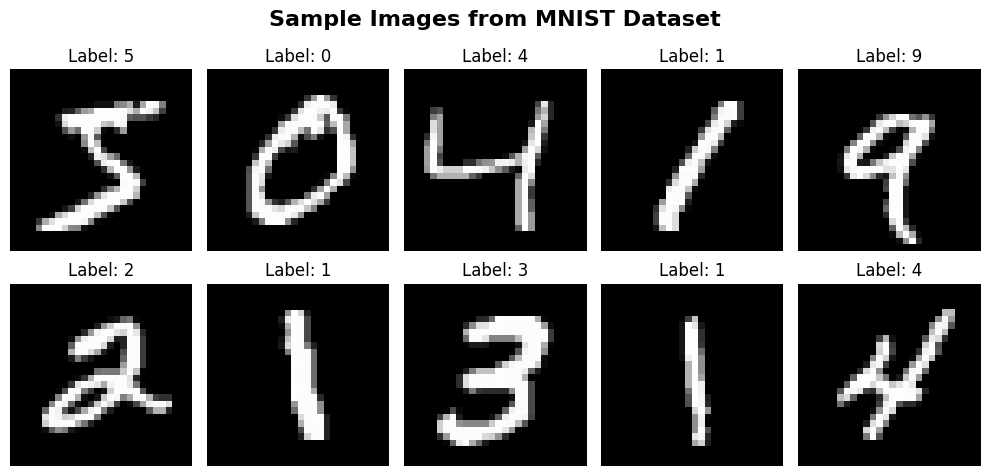

In [59]:
# Sample Images from the Dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16, fontweight='bold')
plt.tight_layout()      
plt.show()


In [60]:
x_min, x_max = x_train.min(), x_train.max()
print(f"Pixel value range: {x_min} to {x_max}")
y_min, y_max = y_train.min(), y_train.max()
print(f"Label value range: {y_min} to {y_max}")


Pixel value range: 0.0 to 1.0
Label value range: 0 to 9


### 1) Pixel value range

```python
x_train.min(), x_train.max()
```

Checks the smallest and largest pixel values in images.

After normalization:
[
\text{Expected Range} = 0.0 \text{ to } 1.0
]

If you see:

```
0 to 255
```

👉 Normalization failed.

If you see:

```
0.0 to 1.0
```

👉 Preprocessing correct ✅

---

### 2) Label value range

```python
y_train.min(), y_train.max()
```

Checks class labels.

For MNIST:
[
0 \text{ to } 9
]

This confirms:

* correct dataset
* no corrupted labels
* suitable output layer size

---

### Why This Is Important

This is a **data validation step** before training.

| Check       | Detects                         |
| ----------- | ------------------------------- |
| Pixel range | Normalization errors            |
| Label range | Wrong dataset / missing classes |

---

### Data Validation: Pixel and Label Range

```python
x_min, x_max = x_train.min(), x_train.max()
print(f"Pixel value range: {x_min} to {x_max}")

y_min, y_max = y_train.min(), y_train.max()
print(f"Label value range: {y_min} to {y_max}")
````

---

#### Purpose

Verifies preprocessing and dataset correctness before model training.

---

#### 1. Pixel Value Range

Checks normalization:

Expected:
[
0.0 \leq pixel \leq 1.0
]

If values are `0–255`, normalization was not applied.

---

#### 2. Label Value Range

Checks valid classes.

For digit classification:
[
0 \leq label \leq 9
]

---

#### Why This Step Matters

* Prevents training errors
* Confirms correct preprocessing
* Ensures model output layer matches number of classes


In [61]:
# NORMALIZE PIXEL VALUES
# Convert pixel values from integers (0-255) to floats (0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("After normalization:")
print("Training data min:", x_train.min(), "max:", x_train.max())
print("Testing data min:", x_test.min(), "max:", x_test.max())

After normalization:
Training data min: 0.0 max: 0.003921569
Testing data min: 0.0 max: 0.003921569


### 1) Convert to float

```python
.astype("float32")
```

Images originally store pixel values as integers:

[
0, 1, 2, ..., 255
]

Neural networks perform calculations using decimals → so we convert to **floating point numbers**.

---

### 2) Normalize values

```python
/ 255.0
```

Scales the pixel values:

[
0 - 255 \rightarrow 0.0 - 1.0
]

Example:

| Original | Normalized |
| -------- | ---------- |
| 0        | 0.0        |
| 128      | 0.502      |
| 255      | 1.0        |

---

### 3) Why normalization is needed

Without normalization:

* gradients become large
* training unstable
* slower convergence

With normalization:

* faster learning
* better accuracy
* stable gradients

---

### 4) Verify normalization

```python
x_train.min(), x_train.max()
```

Expected output:

```
Training data min: 0.0 max: 1.0
Testing data min: 0.0 max: 1.0
```

---

⚠️ Note
If you already normalized earlier, this step would **double normalize** and produce very small values (0–0.0039).
So normalization should be done **only once**.

---
### Pixel Normalization

```python
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("After normalization:")
print("Training data min:", x_train.min(), "max:", x_train.max())
print("Testing data min:", x_test.min(), "max:", x_test.max())
````

---

#### Purpose

Scales image pixel values to improve neural network training performance.

---

#### Conversion

Original pixel values:
[
0 - 255
]

Normalized values:
[
0.0 - 1.0
]

---

#### Why Normalization?

* Faster convergence
* Stable gradients
* Improved accuracy

---

#### Verification

Expected output:

```
Training data min: 0.0 max: 1.0
Testing data min: 0.0 max: 1.0
```

---

#### Important Note

Normalization should only be applied once. Repeating it will shrink values excessively.

```

---

You’re basically finishing the **data preprocessing section** — next comes label encoding (`to_categorical`) or model architecture.
```


In [62]:
# Define the CNN architecture
model = Sequential([
    # First Conv + Pool block
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Second Conv + Pool block
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Flatten + Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Output Layer (10 classes for digits 0–9)
    Dense(10, activation='softmax')
])

### 1️⃣ Convolution Layer

```python
Conv2D(32, (3,3), activation='relu')
```

Extracts image features:

* edges
* curves
* shapes

32 filters = 32 feature detectors

---

### 2️⃣ Max Pooling

```python
MaxPooling2D((2,2))
```

Reduces image size:

* speeds training
* keeps important features

---

### 3️⃣ Dropout

```python
Dropout(0.25)
```

Randomly disables 25% neurons → prevents overfitting.

---

### 4️⃣ Second Convolution Block

```python
Conv2D(64, (3,3), activation='relu')
```

Learns more complex patterns:

* corners
* digit parts
* structures

64 filters = deeper understanding

---

### 5️⃣ Flatten

```python
Flatten()
```

Converts 2D feature maps → 1D vector
Needed before Dense layers.

---

### 6️⃣ Dense Layer

```python
Dense(128, activation='relu')
```

Fully connected layer = decision making.

---

### 7️⃣ Output Layer

```python
Dense(10, activation='softmax')
```

Softmax outputs probability:

[
P(0), P(1), ..., P(9)
]

Highest probability = predicted digit

---


### CNN Model Architecture

```python
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])
````

---

#### Model Purpose

A Convolutional Neural Network (CNN) designed for handwritten digit classification (0–9).

---

#### Architecture Breakdown

**1. Convolution Layers**

* Extract image features
* Learn edges and shapes

**2. MaxPooling**

* Reduces spatial size
* Improves efficiency

**3. Dropout**

* Prevents overfitting
* Randomly disables neurons during training

**4. Flatten**
Converts feature maps to vector for Dense layers.

**5. Dense Layer**
Learns classification patterns.

**6. Output Layer**
Softmax produces probability for each digit:

[
10 \text{ output classes}
]

---

#### Final Goal

Predict the correct digit from an input image.

```




In [63]:
# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

In [64]:
# Compile the CNN model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

### 1️⃣ Optimizer

```python
optimizer='adam'
```

The optimizer controls **how weights are updated** during learning.

Adam = Adaptive Moment Estimation
It automatically adjusts learning rate.

✔ Fast
✔ Stable
✔ Works well for most problems

---

### 2️⃣ Loss Function

```python
loss='sparse_categorical_crossentropy'
```

Measures how wrong the prediction is.

We use **sparse categorical crossentropy** because labels are integers:

[
0,1,2,3,4,5,6,7,8,9
]

If labels were one-hot encoded → we would use:

```
categorical_crossentropy
```

---

### 3️⃣ Metrics

```python
metrics=['accuracy']
```

What we want to monitor during training.

Accuracy:
[
\frac{Correct\ Predictions}{Total\ Predictions}
]

---

### 4️⃣ Model Summary

```python
model.summary()
```

Displays:

* each layer
* output shapes
* number of parameters

Helps verify architecture correctness.

---

### Model Compilation

```python
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()
````

---

#### Purpose

Configures the neural network for training by defining how it learns and evaluates performance.

---

#### Optimizer: Adam

Adaptive learning rate optimization algorithm.

Advantages:

* Fast convergence
* Stable training
* Minimal tuning required

---

#### Loss Function

`sparse_categorical_crossentropy`

Used when labels are integers:
[
0 - 9
]

If labels are one-hot encoded → use `categorical_crossentropy`.

---

#### Metrics

`accuracy`

Measures percentage of correct predictions.

---

#### Model Summary

Displays:

* Layers
* Output shapes
* Trainable parameters

Used to verify model architecture before training.

```


In [65]:
# Train the model with validation split
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

# Check what metrics are stored in history
print("History keys:", history.history.keys())

Epoch 1/10
422/422 [==============================] - 25s 56ms/step - loss: 1.2985 - accuracy: 0.5612 - val_loss: 0.3885 - val_accuracy: 0.8930
Epoch 2/10
422/422 [==============================] - 22s 53ms/step - loss: 0.5253 - accuracy: 0.8342 - val_loss: 0.2325 - val_accuracy: 0.9352
Epoch 3/10
422/422 [==============================] - 24s 56ms/step - loss: 0.3853 - accuracy: 0.8828 - val_loss: 0.1551 - val_accuracy: 0.9588
Epoch 4/10
422/422 [==============================] - 23s 55ms/step - loss: 0.3045 - accuracy: 0.9092 - val_loss: 0.1196 - val_accuracy: 0.9652
Epoch 5/10
422/422 [==============================] - 24s 57ms/step - loss: 0.2614 - accuracy: 0.9206 - val_loss: 0.1010 - val_accuracy: 0.9697
Epoch 6/10
422/422 [==============================] - 23s 54ms/step - loss: 0.2280 - accuracy: 0.9314 - val_loss: 0.0907 - val_accuracy: 0.9742
Epoch 7/10
422/422 [==============================] - 23s 54ms/step - loss: 0.2103 - accuracy: 0.9360 - val_loss: 0.0821 - val_accuracy:

### 1️⃣ `model.fit()`

This starts the training process.

The model:

1. Takes an image
2. Predicts a digit
3. Compares with actual label
4. Adjusts weights
5. Repeats thousands of times

---

### 2️⃣ Parameters

#### `batch_size=128`

Instead of learning from all images at once, the model learns in groups.

[
60000\ images \rightarrow batches\ of\ 128
]

Benefits:

* faster training
* less memory usage
* stable gradients

---

#### `epochs=10`

Number of times the model sees the entire dataset.

[
1\ epoch = full\ pass\ over\ training\ data
]

10 epochs → model learns 10 times

---

#### `validation_split=0.1`

Uses **10% of training data** for validation.

Purpose:

* check performance on unseen data
* detect overfitting

| Data | Usage      |
| ---- | ---------- |
| 90%  | Training   |
| 10%  | Validation |

---

#### `verbose=1`

Shows training progress bar.

---

### 3️⃣ History Object

```python
history = model.fit(...)
```

Stores training results for each epoch:

Example keys:

```
loss
accuracy
val_loss
val_accuracy
```

---

### 4️⃣ Checking stored metrics

```python
history.history.keys()
```

Output:

```
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
```

Used later for graphs 📊

---

### Model Training

```python
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

print("History keys:", history.history.keys())
````

---

#### Purpose

Trains the CNN to learn patterns from training images.

---

#### Parameters

**Batch Size = 128**

* Number of samples processed at once
* Improves speed and stability

**Epochs = 10**
[
1\ epoch = 1\ full\ dataset\ pass
]

**Validation Split = 0.1**

* 10% data used for validation
* Detects overfitting

---

#### History Object

Stores metrics per epoch:

* training loss
* training accuracy
* validation loss
* validation accuracy

Used for performance visualization.

```




313/313 [==============================] - 2s 6ms/step


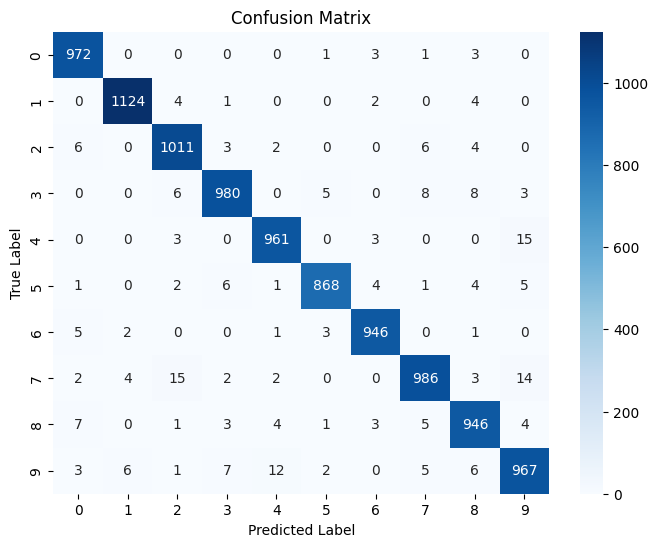

In [66]:
# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')    
plt.show()  


In [67]:
# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



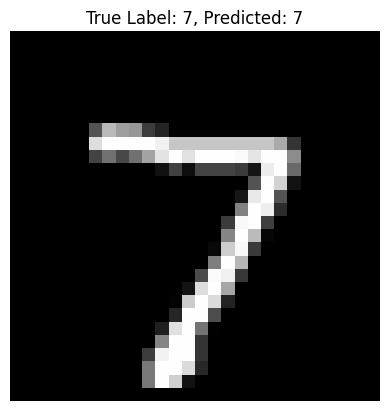

In [68]:
image_index = 0
plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
plt.title(f"True Label: {y_test[image_index]}, Predicted: {y_pred[image_index]}", fontsize=12)
plt.axis('off')
plt.show()

### 1️⃣ Select an image

```python
image_index = 0
```

Chooses the first image from the test dataset.

You can change this number to check other predictions:

```
image_index = 25
image_index = 123
```

---

### 2️⃣ Display the image

```python
plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
```

* Test images stored as `(28, 28, 1)`
* Matplotlib needs `(28, 28)` → so we reshape
* `cmap='gray'` shows grayscale image

---

### 3️⃣ Show true vs predicted label

```python
plt.title(f"True Label: {y_test[image_index]}, Predicted: {y_pred[image_index]}")
```

Compares:

* Actual digit (ground truth)
* Model prediction

Example:

```
True Label: 7, Predicted: 7  ✅ correct
True Label: 9, Predicted: 4  ❌ wrong
```

---

### 4️⃣ Remove axis

```python
plt.axis('off')
```

Cleaner visualization.

---

## Why This Is Important

This is **qualitative evaluation** — not just accuracy numbers.

You can:

* understand model mistakes
* detect confusing digits (e.g., 5 vs 3)
* debug preprocessing problems

---

### Visualizing Prediction Results

```python
image_index = 0
plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
plt.title(f"True Label: {y_test[image_index]}, Predicted: {y_pred[image_index]}")
plt.axis('off')
plt.show()
````

---

#### Purpose

Displays a test image and compares the actual label with the model prediction.

---

#### Steps

1. Select an image from test dataset
2. Display the grayscale image
3. Show true and predicted labels
4. Remove axis for clarity

---

#### Why Important

* Helps interpret model behavior
* Detects incorrect predictions
* Provides visual validation of accuracy

```


In [69]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(f"Predicted Digit: {pred.argmax()}")

1/1 [==============================] - 0s 35ms/step
Predicted Digit: 7


In [70]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Test Accuracy: 0.9761
✅ Test Loss: 0.0738


## 🔍 Code

```python
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")
```

---

## 🧠 Explanation (Step by Step)

### 1️⃣ `model.evaluate()`

```python
model.evaluate(x_test, y_test)
```

The model:

1. Predicts labels for test images
2. Compares predictions with true labels
3. Calculates performance metrics

Important:
The test dataset was **never used during training** → gives real performance.

---

### 2️⃣ Outputs

```python
test_loss, test_accuracy
```

| Metric       | Meaning                           |
| ------------ | --------------------------------- |
| **Loss**     | How wrong predictions are         |
| **Accuracy** | Percentage of correct predictions |

Example:

```
Test Accuracy: 0.9875 → 98.75%
Test Loss: 0.0352
```

---

### 3️⃣ `verbose=0`

Hides progress bar → cleaner output.

---

### Why This Step Is Important

This is the **final performance score** of your model.

| Dataset    | Purpose          |
| ---------- | ---------------- |
| Training   | Learning         |
| Validation | Tuning           |
| Test       | Final evaluation |

---

### Model Evaluation on Test Data

```python
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
````

---

#### Purpose

Measures model performance on unseen test data.

---

#### Metrics

**Accuracy**
[
\frac{Correct\ Predictions}{Total\ Predictions}
]

**Loss**
Indicates prediction error — lower is better.

---

#### Why Test Set Matters

* Training set → learning
* Validation set → tuning
* Test set → final unbiased evaluation

```



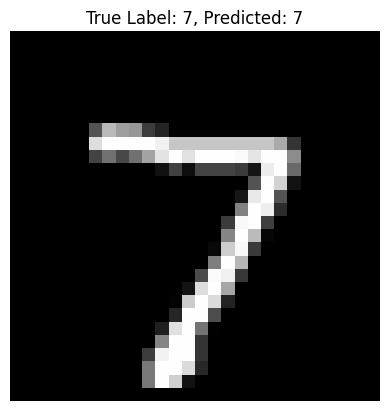

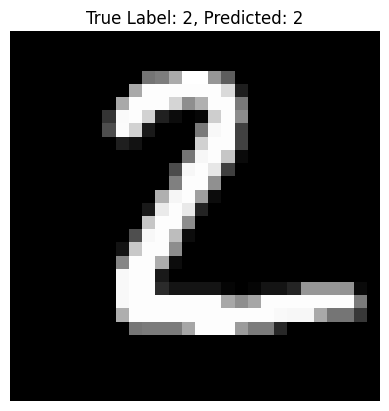

In [71]:
for image_index in range(2):   # show first 10 test images
    plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
    plt.title(f"True Label: {y_test[image_index]}, Predicted: {y_pred[image_index]}", fontsize=12)
    plt.axis('off')
    plt.show()


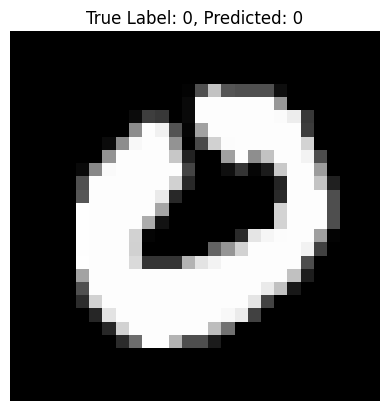

In [72]:
image_index = 25   # try any value: 1, 50, 123, 999...

plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
plt.title(f"True Label: {y_test[image_index]}, Predicted: {y_pred[image_index]}", fontsize=12)
plt.axis('off')
plt.show()


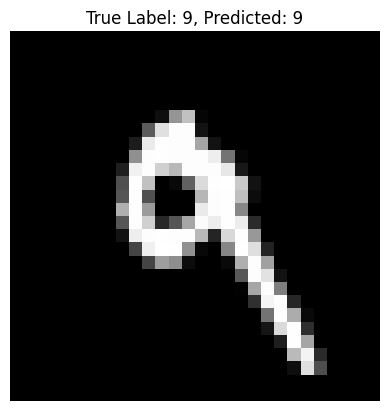

In [73]:
image_index = 7   # try any value: 1, 50, 123, 999...

plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
plt.title(f"True Label: {y_test[image_index]}, Predicted: {y_pred[image_index]}", fontsize=12)
plt.axis('off')
plt.show()


In [74]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(f"Predicted Digit: {pred.argmax()}")

1/1 [==============================] - 0s 36ms/step
Predicted Digit: 9
